In [24]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
BASE_PATH = Path.cwd()
DATA_PATH = BASE_PATH /'data'
MAP_PATH = DATA_PATH / 'map'
CASE_PATH = DATA_PATH / 'case'

In [6]:
gdf = gpd.read_file(MAP_PATH /'commune_w_case.json')

In [17]:
bins = [0, 5, 10, np.inf]
labels = ['0-5', '6-10', '10+']
gdf['observed_binned'] = pd.cut(gdf['observed'], bins=bins, labels=labels, include_lowest=True)
years = sorted(gdf['year'].unique())


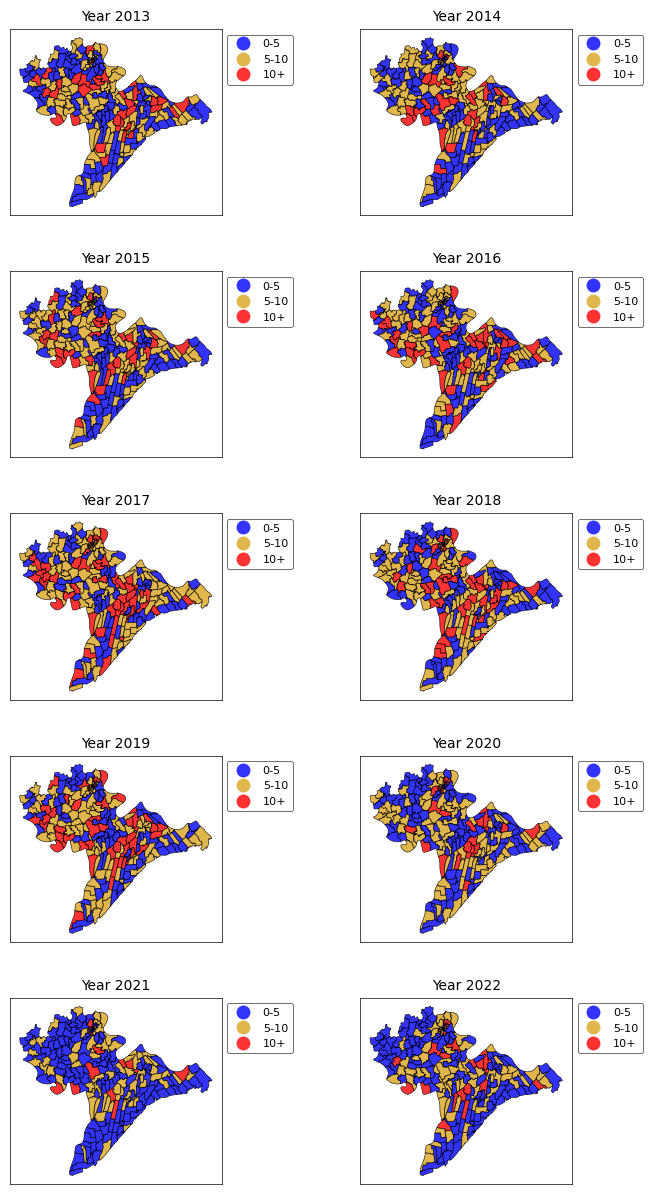

In [62]:
colors = [
    "blue",
    "#DAA520",
    "red",
]  # Simple color names, or use hex codes like ['#0000ff', '#ffff00', '#ff0000']
custom_colormap = ListedColormap(colors)

# Assuming your GeoDataFrame 'gdf' is prepared
years = sorted(gdf["year"].unique())


def plot_year_data(year, ax):
    # Filter data for the specified year
    data_for_year = gdf[gdf["year"] == year]
    # Plotting
    data_for_year.plot(
        column="observed_binned",
        ax=ax,
        legend=True,
        legend_kwds={
            "loc": "upper left",
            "bbox_to_anchor": (1, 1),
            "frameon": True,  # Ensure that frame is on
            "edgecolor": "black",  # Solid black border for the legend
            "facecolor": "white",  # Background color of the legend
            "fontsize": 8,  # Adjust font size
            "title_fontsize": 10,  # Font size for the legend title (if any)
        },
        cmap=custom_colormap,
        edgecolor="black",  # Black boundaries for each area
        linewidth=0.5,  # A colorblind-friendly color map
        alpha=0.8,
    )
    ax.set_title(f"Year {year}", fontsize=10)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # Adjusting legend border width manually
    
    # Modify legend after creation
    legend = ax.get_legend()
    legend.get_frame().set_linewidth(0.5)

    # Setting spines to be visible with a thicker black border
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_edgecolor("black")


# Calculate the number of rows needed for the two-column layout
n_rows = (len(years) + 1) // 2
height_per_row = 3
total_height = n_rows * height_per_row

fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(8, total_height))
axes = axes.flatten()

for i, year in enumerate(years):
    plot_year_data(year, axes[i])

# Hide unused axes if the number of years is odd
if len(years) % 2 != 0:
    axes[-1].set_visible(False)

fig.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing
plt.show()

In [53]:
plt.savefig('output_figure.pdf', dpi=300, bbox_inches='tight', pad_inches=0.5)  # Adjust pad_inches as needed to include the border

<Figure size 640x480 with 0 Axes>